<a href="https://colab.research.google.com/github/Arunprabhakaran04/stock_analysis/blob/main/stock_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas scikit-learn tensorflow matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/R_project/Merged_data_HSB.csv"

In [ ]:
def load_and_prepare_data(path):
    data = pd.read_csv(path, parse_dates=['Date'])
    data = data.dropna()
    X = data.drop(columns=['Date', 'tomorrow'])
    y = data['tomorrow']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y.values

In [ ]:
X, y = load_and_prepare_data(path)

In [ ]:
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
def train_and_evaluate(X, y):
    X_train, X_test = X[:-50], X[-50:]
    y_train, y_test = y[:-50], y[-50:]
    model = create_model(X.shape[1])
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Neural Network RMSE: {rmse:.4f}")
    return y_test, y_pred

In [ ]:
def plot_predictions(y_test, y_pred):
    plt.plot(range(len(y_test)), y_test, label="Actual")
    plt.plot(range(len(y_pred)), y_pred, label="Predicted")
    plt.legend()
    plt.title("Prediction vs Actual")
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Neural Network RMSE: 1435.5455


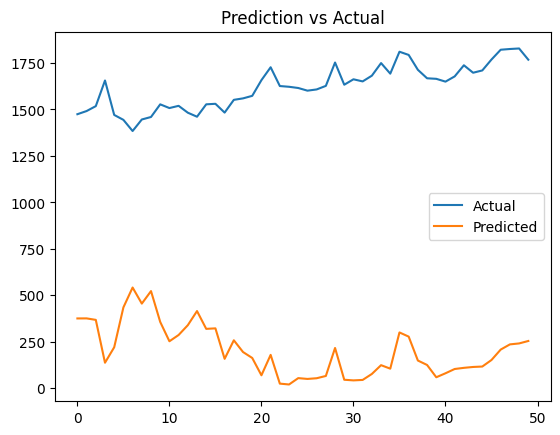

In [ ]:
if __name__ == "__main__":
    X, y = load_and_prepare_data(path)
    y_test, y_pred = train_and_evaluate(X, y)
    plot_predictions(y_test, y_pred)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
SEQ_LEN = 10


In [ ]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

In [ ]:
def load_and_prepare_data(path):
    data = pd.read_csv(path, parse_dates=['Date'])
    data = data.dropna()
    X = data.drop(columns=['Date', 'tomorrow'])
    y = data['tomorrow'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return create_sequences(X_scaled, y, SEQ_LEN)

In [ ]:
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [ ]:
def train_model(model, X_train, y_train, epochs=150, batch_size=16):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=True)
    return model

In [ ]:
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred = model.predict(X_test)
    y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler_y.inverse_transform(y_pred).flatten()

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    print(f"LSTM RMSE: {round(rmse, 4)}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Actual', marker='o')
    plt.plot(y_pred_inv, label='Predicted', marker='x')
    plt.title('LSTM Prediction vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return y_test_inv, y_pred_inv

In [ ]:
df = pd.read_csv(path, parse_dates=["Date"]).dropna()
X = df.drop(columns=["Date", "tomorrow"])
y = df["tomorrow"].values.reshape(-1, 1)

In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
SEQ_LEN = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LEN)

In [ ]:
  X_train, X_test = X_seq[:-50], X_seq[-50:]
y_train, y_test = y_seq[:-50], y_seq[-50:]

In [ ]:
model = build_model(input_shape=(SEQ_LEN, X_seq.shape[2]))
model = train_model(model, X_train, y_train)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3780
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3796
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3093
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3344
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3512
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2580
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2479
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2028
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1891
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1733
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1392
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1432
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1273
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1548
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0996
Epoch 16/150
1/1 ━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step
LSTM RMSE: 207.5221


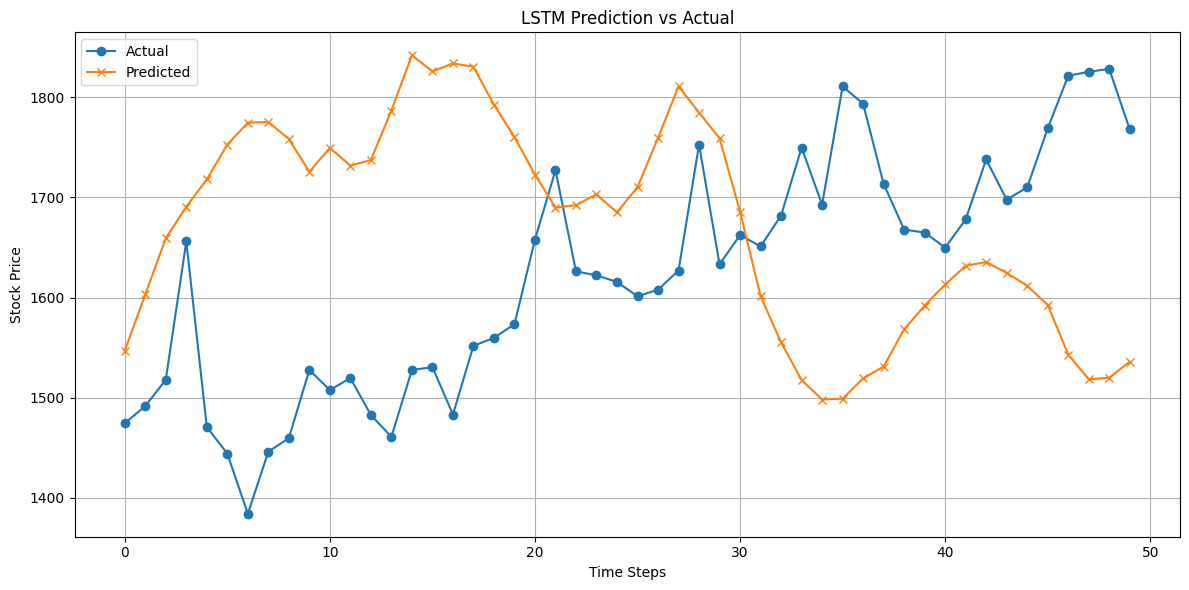

(array([1474.5       , 1491.55004883, 1517.94995117, 1655.94995117,
        1470.65002441, 1444.09997559, 1384.05004883, 1446.09997559,
        1459.55004883, 1527.59997559, 1507.59997559, 1519.59997559,
        1482.65002441, 1460.94995117, 1527.69995117, 1530.5       ,
        1483.15002441, 1551.80004883, 1559.69995117, 1573.34997559,
        1657.84997559, 1727.15002441, 1626.09997559, 1622.09997559,
        1615.55004883, 1601.19995117, 1607.80004883, 1626.94995117,
        1752.65002441, 1633.15002441, 1662.40002441, 1651.        ,
        1681.84997559, 1749.65002441, 1692.75      , 1810.69995117,
        1793.5       , 1713.40002441, 1667.80004883, 1664.90002441,
        1649.80004883, 1678.        , 1737.80004883, 1697.69995117,
        1710.        , 1768.75      , 1821.44995117, 1825.34997559,
        1828.19995117, 1767.84997559]),
 array([1547.0516, 1603.025 , 1659.1482, 1690.5504, 1717.9869, 1752.6074,
        1774.6174, 1775.1147, 1758.2152, 1725.5571, 1749.4093, 1731.73

In [ ]:
evaluate_model(model, X_test, y_test, scaler_y)